In [1]:
from skimage.feature import local_binary_pattern
from sklearn.neighbors import KNeighborsClassifier



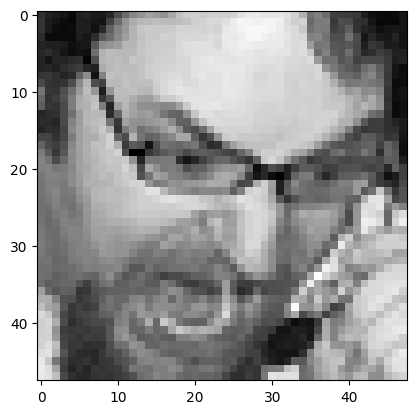

In [3]:


import cv2
import matplotlib.pyplot as plt 
import numpy as np 

image = cv2.imread("test/angry/PrivateTest_10131363.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.array(image)
plt.imshow(image, cmap='gray')

(48, 48)


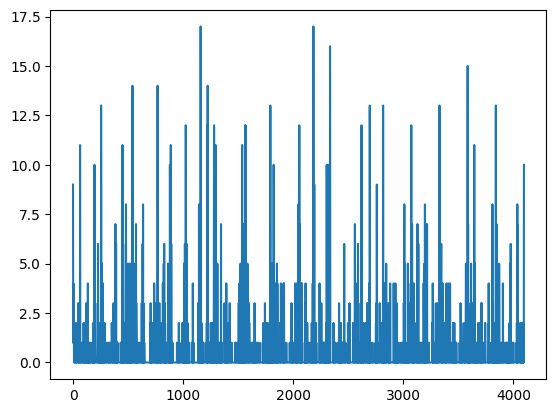

In [ ]:

print(image.shape)
def lbp(image, block_size, radius):
    height, width = image.shape
    
    if height % block_size != 0 or width % block_size != 0:
        print("Not Ok")
        return None  # Retournez None en cas d'erreur
    
    num_it = int(height / block_size)
    n_points = 8 * radius  # 8 points pour chaque voisinage de rayon donné
    lbp_patches = []

    for i in range(num_it):
        for j in range(num_it):
            i_index = i * block_size
            j_index = j * block_size
            patch = image[i_index:i_index + block_size, j_index:j_index + block_size]
            
            # Calcul du LBP pour le patch
            lbp_patch = local_binary_pattern(patch, n_points, radius)
            
            # Calcul de l'histogramme pour le patch
            lbp_hist, _ = np.histogram(lbp_patch.ravel(), bins=256, range=(0, 256))
            
            # Ajouter les valeurs à la liste globale
            lbp_patches.extend(lbp_hist)
    
    return lbp_patches


radius = 1
block_size = 12
lbp_hist = lbp(image, block_size, radius)

if lbp_hist is not None:
    plt.plot(lbp_hist)
    plt.show()

In [10]:
import os 

train_dir = "train/"
X_train = []
Y_train = []

# Lecture des données
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if os.path.isfile(img_path):
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Image {img_path} could not be loaded. Skipping.")
                    continue
                
                # Extraction des caractéristiques avec LBP
                features = lbp(image, block_size, radius)
                if features is not None:
                    X_train.append(features)
                    Y_train.append(class_name)

# Conversion en tableaux numpy
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of labels: {len(Y_train)}")

Number of training samples: 28709
Number of labels: 28709


## Test du jeu de données

suivant
suivant
suivant
suivant
suivant
suivant
suivant
Number of training samples: 7178
Number of labels: 7178
Accuracy: 0.4003900808024519


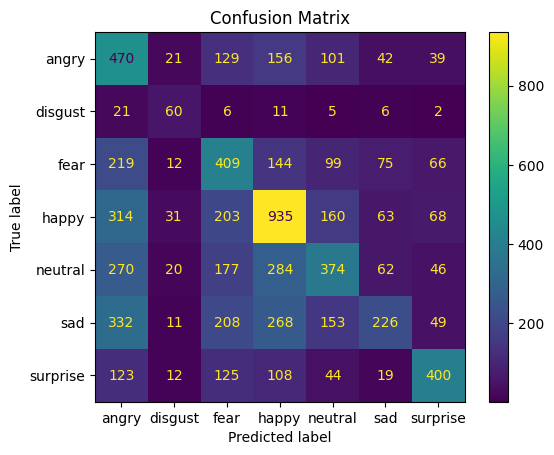

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_test = []
Y_test = []
test_dir = "test/"
for class_name in os.listdir(test_dir):
    print('suivant')
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if os.path.isfile(img_path):
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Image {img_path} could not be loaded. Skipping.")
                    continue
                
                # Extraction des caractéristiques avec LBP
                features = lbp(image, block_size, radius)
                if features is not None:
                    X_test.append(features)
                    Y_test.append(class_name)

# Conversion en tableaux numpy
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(f"Number of training samples: {len(X_test)}")
print(f"Number of labels: {len(Y_test)}")
X_train_split, X_test_split, Y_train_split, Y_test_split = X_train, X_test, Y_train, Y_test 

# Entraînement du modèle Knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_split, Y_train_split)

# Évaluation
Y_pred = knn.predict(X_test_split)
print("Accuracy:", accuracy_score(Y_test_split, Y_pred))


cm = confusion_matrix(Y_test_split, Y_pred, labels=np.unique(Y_train))

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_train))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.40638060741153526


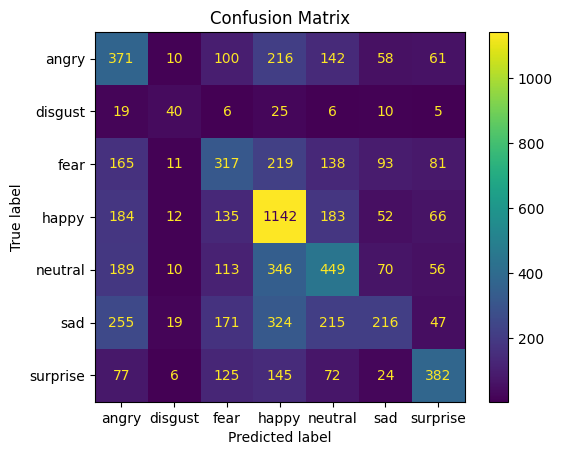

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_split, Y_train_split)

# Évaluation
Y_pred = knn.predict(X_test_split)
print("Accuracy:", accuracy_score(Y_test_split, Y_pred))


cm = confusion_matrix(Y_test_split, Y_pred, labels=np.unique(Y_train))

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_train))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'n_neighbors': 1, 'weights': 'uniform'}


C:\Users\Valentin\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy: 0.46168849261632766


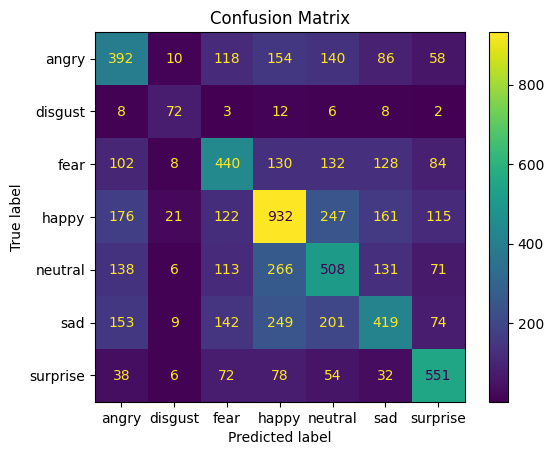

In [17]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train_split, Y_train_split)

# Évaluation
Y_pred = knn.predict(X_test_split)
print("Accuracy:", accuracy_score(Y_test_split, Y_pred))


cm = confusion_matrix(Y_test_split, Y_pred, labels=np.unique(Y_train))

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_train))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.40373363053775424


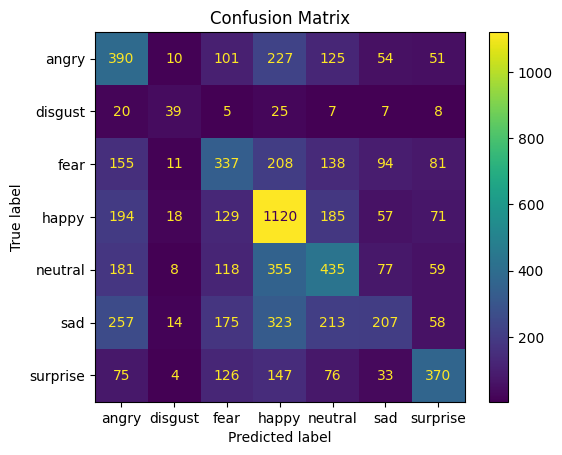

In [19]:
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(X_train_split, Y_train_split)

# Évaluation
Y_pred = knn.predict(X_test_split)
print("Accuracy:", accuracy_score(Y_test_split, Y_pred))


cm = confusion_matrix(Y_test_split, Y_pred, labels=np.unique(Y_train))

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_train))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()